Lógica da query SQL para juntar todas as informações relevantes em uma única "tabela mestra".

 Célula 1: Importar o pandas e carregar os dados  
import pandas as pd
import os

Caminho para a pasta de dados
DATA_PATH = "C:\Users\edsoo\pipeline_elen_dados_vendas/dados/"

Dicionário com os nomes dos arquivos para facilitar o carregamento

A chave será o nome do dataframe, e o valor o nome do arquivo .csv

files_names = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'order_payments': 'olist_order_payments_dataset.csv',
    'order_reviews': 'olist_order_reviews_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'product_category_name_translation': 'product_category_name_translation.csv'
}



In [1]:
import pandas as pd
import os

DATA_PATH = "../dados/"

files_names = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'order_payments': 'olist_order_payments_dataset.csv',
    'order_reviews': 'olist_order_reviews_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'product_category_name_translation': 'product_category_name_translation.csv'
}

In [2]:
# Carregar todos os arquivos em um dicionário de dataframes
data = {}
for name, file_name in files_names.items():
    file_path = os.path.join(DATA_PATH, file_name)
    data[name] = pd.read_csv(file_path)

# Verificar se todos os dataframes foram carregados
print(data.keys())    

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'product_category_name_translation'])



 Vamos executar os JOINs da nossa query SQL, um por um.


In [3]:
# Célula 2: Juntando (merge) os dataframes

# Começamos com o dataframe de 'pedidos' (orders)
# Este será nosso dataframe principal (df)
df = data['orders'].copy()

# Juntando com 'order_items'
df = pd.merge(
    df,
    data['order_items'],
    on='order_id',
    how='left'
)

In [4]:
# Juntando com 'customers'
df = pd.merge(
    df,
    data['customers'],
    on='customer_id',
    how='left'
)

In [5]:
# Juntando com 'products'
df = pd.merge(
    df,
    data['products'],
    on='product_id',
    how='left'
)

In [6]:
# Juntando com 'sellers'
df = pd.merge(
    df,
    data['sellers'],
    on='seller_id',
    how='left'
)

In [7]:
# Juntando com a tradução das categorias de produtos
df = pd.merge(
    df,
    data['product_category_name_translation'],
    on='product_category_name',
    how='left'
)

Agora temos um único dataframe df com tudo junto. Vamos fazer uma primeira inspeção para entender o que temos em mãos.

In [8]:
# Célula 3: Inspeção inicial do dataframe

# 1. Visualizar as 5 primeiras linhas
print("--- Visualizando as 5 primeiras linhas ---")
display(df.head())

--- Visualizando as 5 primeiras linhas ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [9]:
# 2. Verificar as dimensões do dataframe (linhas, colunas)
print(f"\n--- O dataframe tem {df.shape[0]} linhas e {df.shape[1]} colunas ---")



--- O dataframe tem 113425 linhas e 30 colunas ---


In [10]:
# 3. Obter um resumo técnico (tipos de dados, valores não-nulos)
print("\n--- Resumo técnico do dataframe ---")
df.info()


--- Resumo técnico do dataframe ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object

In [11]:
# 4. Contar a quantidade de valores nulos por coluna
print("\n--- Contagem de valores nulos por coluna ---")
display(df.isnull().sum())


--- Contagem de valores nulos por coluna ---


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
seller_zip_c

In [12]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')


Fase 1 concluída!

O que fizemos:

1. Obtivemos os dados de uma fonte externa.

2. Entendemos a lógica relacional entre as diferentes tabelas (a lógica SQL).

3. Executamos essa lógica com Pandas para criar um dataframe unificado.

4. Fizemos uma primeira inspeção para entender a estrutura, tamanho e a quantidade de dados faltantes no nosso novo conjunto de dados.

______________________________

Fase 2: Análise Exploratória e Pré-processamento

2.1. Seleção de Colunas (Feature Selection)
Nosso dataframe df está enorme e com muitas colunas que não são relevantes para uma análise de pipeline de vendas (ex: product_weight_g, product_length_cm, etc.). Vamos focar no que importa.

In [15]:
# Célula 4: Selecionando as colunas mais relevantes

colunas_selecionadas = [
    'order_id',
    'order_status',
    'order_purchase_timestamp',
    'order_approved_at',
    'price',
    'freight_value',
    'customer_state',
    'product_category_name_english',
    'seller_state'
]

df_pipeline = df[colunas_selecionadas].copy()

# O .copy() é importante para evitar avisos do pandas ao modificar o dataframe
display(df_pipeline.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,price,freight_value,customer_state,product_category_name_english,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,29.99,8.72,SP,housewares,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,118.70,22.76,BA,perfumery,SP
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,159.90,19.22,GO,auto,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,45.00,27.20,RN,pet_shop,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,19.90,8.72,SP,stationery,SP


2.2. Limpeza e Transformação de Dados

Com base no que vimos no df.info() e df.isnull().sum() na fase anterior, temos dois problemas principais: dados faltantes e tipos de dados errados (datas como texto).

In [16]:
# Célula 5: Lidando com dados faltantes e corrigindo tipos

# 1. Lidando com Dados Faltantes
# Para este projeto, a estratégia mais simples é remover as linhas que contêm
# qualquer valor nulo nas colunas que selecionamos.
# Nosso dataset é grande o suficiente para que essa perda não seja um problema.
print(f"Linhas antes da limpeza: {df_pipeline.shape[0]}")
df_pipeline.dropna(inplace=True)
print(f"Linhas depois da limpeza: {df_pipeline.shape[0]}")

Linhas antes da limpeza: 113425
Linhas depois da limpeza: 111009


In [17]:
# 2. Corrigindo Tipos de Dados (Datas)
# Precisamos converter as colunas de data, que estão como 'object' (texto),
# para o tipo 'datetime' para podermos fazer cálculos com elas.
colunas_de_data = ['order_purchase_timestamp', 'order_approved_at']
for col in colunas_de_data:
    df_pipeline[col] = pd.to_datetime(df_pipeline[col])

# Verificando as mudanças
print("\n--- Tipos de dados após a conversão ---")
df_pipeline.info()


--- Tipos de dados após a conversão ---
<class 'pandas.core.frame.DataFrame'>
Index: 111009 entries, 0 to 113424
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111009 non-null  object        
 1   order_status                   111009 non-null  object        
 2   order_purchase_timestamp       111009 non-null  datetime64[ns]
 3   order_approved_at              111009 non-null  datetime64[ns]
 4   price                          111009 non-null  float64       
 5   freight_value                  111009 non-null  float64       
 6   customer_state                 111009 non-null  object        
 7   product_category_name_english  111009 non-null  object        
 8   seller_state                   111009 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 8.5+ MB


2.3. Engenharia de Atributos (Feature Engineering)

Aqui nós criamos novas colunas (atributos ou features) a partir das existentes para dar mais "poder" à nossa análise e ao futuro modelo de machine learning.



In [18]:
# Célula 6: Criando novas variáveis de negócio

# 1. Definindo nossa variável-alvo: 'status_venda' (Ganho/Perdido)
# Para nós, uma venda "ganha" é aquela que foi 'delivered'.
# Todas as outras (canceled, unavailable) serão consideradas "perdidas".
df_pipeline['status_venda'] = df_pipeline['order_status'].apply(
    lambda x: 1 if x == 'delivered' else 0
)

In [19]:
# 2. Tempo até a aprovação da compra
# Quanto tempo, em horas, demorou da criação do pedido até o pagamento ser aprovado?
# Isso pode ser um indicador da eficiência do processo ou do perfil do cliente.
df_pipeline['tempo_aprovacao_horas'] = \
    (df_pipeline['order_approved_at'] - df_pipeline['order_purchase_timestamp']) / pd.Timedelta(hours=1)



In [20]:
# 3. Valor total do pedido
df_pipeline['valor_total'] = df_pipeline['price'] + df_pipeline['freight_value']

In [21]:
# 4. Criar Ano/Mês da compra para análises de tendência
df_pipeline['ano_mes_compra'] = df_pipeline['order_purchase_timestamp'].dt.to_period('M')



In [22]:
# Visualizar as novas colunas criadas
display(df_pipeline.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,price,freight_value,customer_state,product_category_name_english,seller_state,status_venda,tempo_aprovacao_horas,valor_total,ano_mes_compra
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,29.99,8.72,SP,housewares,SP,1,0.178333,38.71,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,118.70,22.76,BA,perfumery,SP,1,30.713889,141.46,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,159.90,19.22,GO,auto,SP,1,0.276111,179.12,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,45.00,27.20,RN,pet_shop,MG,1,0.298056,72.20,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,19.90,8.72,SP,stationery,SP,1,1.030556,28.62,2018-02


2.4. Análise Exploratória de Dados (EDA)

Agora que os dados estão limpos e enriquecidos, vamos visualizá-los para encontrar padrões.

In [23]:
# Célula 7: Preparando para a visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais para os gráficos
sns.set_theme(style="whitegrid")

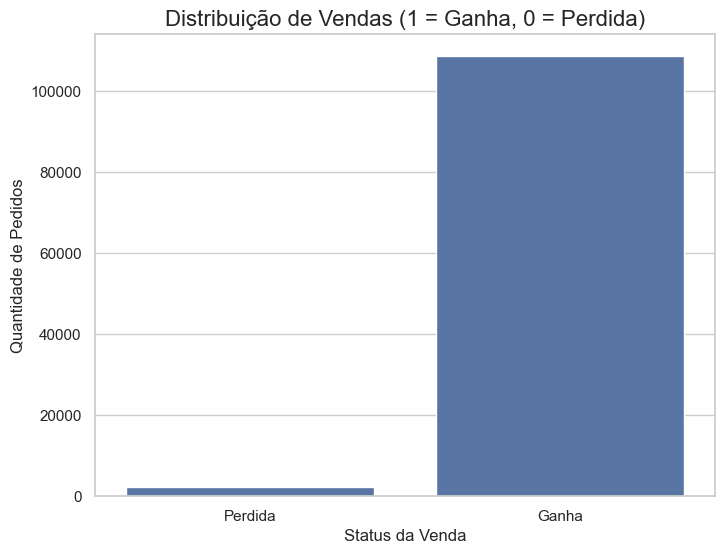

Nossa taxa de conversão (Win Rate) é de: 97.85%


In [24]:
# Célula 8: Qual a nossa taxa de conversão (ganhos vs. perdidos)?

plt.figure(figsize=(8, 6))
sns.countplot(x='status_venda', data=df_pipeline)
plt.title('Distribuição de Vendas (1 = Ganha, 0 = Perdida)', fontsize=16)
plt.xticks([0, 1], ['Perdida', 'Ganha'])
plt.ylabel('Quantidade de Pedidos')
plt.xlabel('Status da Venda')
plt.show()

# Calculando a taxa exata
win_rate = df_pipeline['status_venda'].mean()
print(f"Nossa taxa de conversão (Win Rate) é de: {win_rate:.2%}")

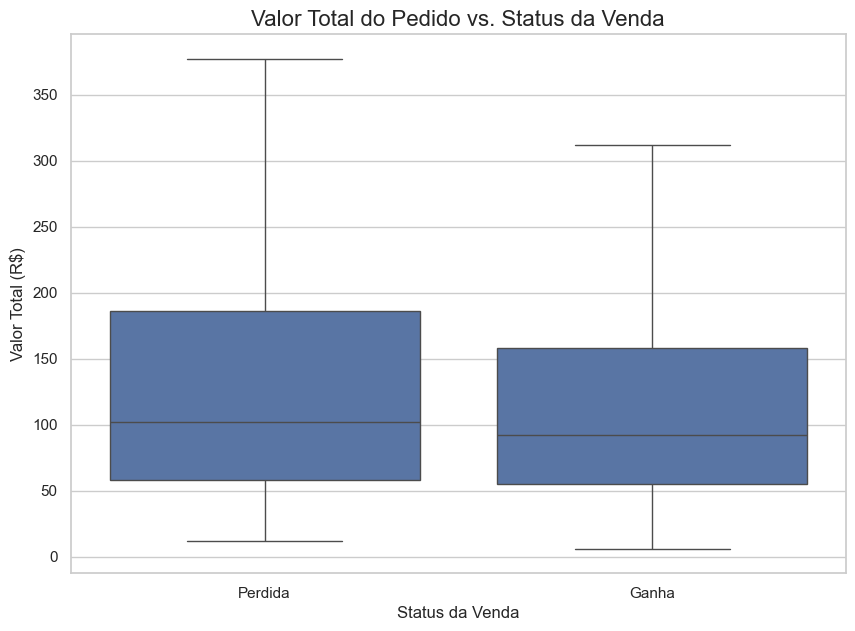

In [25]:
# Célula 9: Qual o valor médio dos pedidos ganhos vs. perdidos?

plt.figure(figsize=(10, 7))
sns.boxplot(x='status_venda', y='valor_total', data=df_pipeline, showfliers=False)
# 'showfliers=False' remove os outliers para uma melhor visualização da caixa

plt.title('Valor Total do Pedido vs. Status da Venda', fontsize=16)
plt.xticks([0, 1], ['Perdida', 'Ganha'])
plt.xlabel('Status da Venda')
plt.ylabel('Valor Total (R$)')
plt.show()

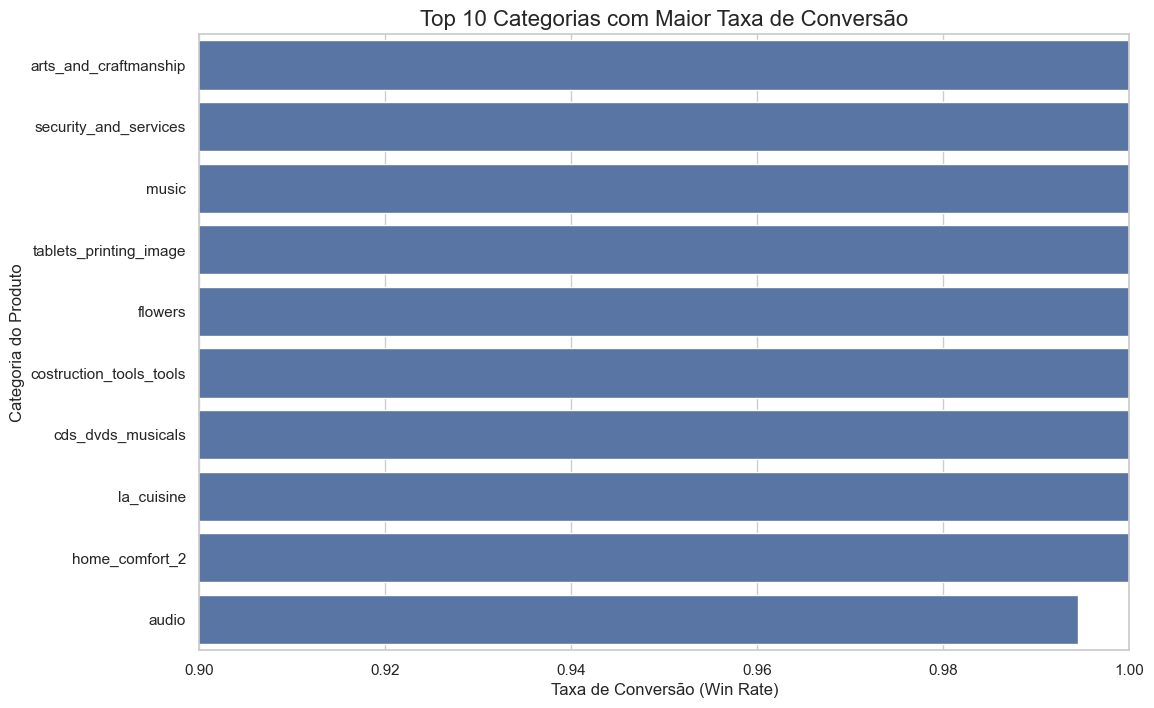

In [26]:
# Célula 10: Top 10 categorias de produtos com maior taxa de conversão

# Calcular a taxa de conversão por categoria
win_rate_por_categoria = df_pipeline.groupby('product_category_name_english')['status_venda'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=win_rate_por_categoria.index, x=win_rate_por_categoria.values, orient='h')
plt.title('Top 10 Categorias com Maior Taxa de Conversão', fontsize=16)
plt.xlabel('Taxa de Conversão (Win Rate)')
plt.ylabel('Categoria do Produto')
plt.xlim(0.9, 1.0) # Ajusta o limite do eixo X para destacar as diferenças
plt.show()

Fase 2 concluída com sucesso!

Resumo do que fizemos:

1. Focamos nosso estudo selecionando as colunas mais importantes.

2. Limpamos os dados, tratando valores ausentes e corrigindo os tipos das colunas.

3. Criamos variáveis de negócio poderosas, como o status_venda (nossa meta), tempo_aprovacao_horas e valor_total.

4. Geramos os primeiros insights visuais, entendendo nossa taxa de conversão e identificando quais fatores, como a categoria do produto, podem influenciá-la.

Os padrões que começamos a ver aqui são exatamente o que um modelo de Machine Learning vai usar para aprender a prever resultados.

_________________________


**Modelo preditivo**

Fase 3: Modelagem de Machine Learning

3.1. Preparação dos Dados para o Modelo
Modelos de machine learning não entendem texto (como 'SP' ou 'RJ'). Precisamos converter todas as nossas colunas para números. Além disso, precisamos separar claramente quais colunas serão usadas para prever (features) e qual coluna é o nosso alvo (target).

In [27]:
# Célula 11: Preparando os dados para o modelo

# 1. Selecionar as features (X) e o alvo (y)
# Features são as variáveis que usaremos para fazer a previsão.
features = [
    'price',
    'freight_value',
    'customer_state',
    'product_category_name_english',
    'tempo_aprovacao_horas'
]

# Target é o que queremos prever.
target = 'status_venda'

X = df_pipeline[features]
y = df_pipeline[target]



In [28]:
# 2. Convertendo variáveis categóricas em numéricas (One-Hot Encoding)
# O pandas tem uma função perfeita para isso: get_dummies.
# Ela transforma cada categoria em uma nova coluna 0 ou 1.
X_encoded = pd.get_dummies(X, columns=['customer_state', 'product_category_name_english'], drop_first=True)

# drop_first=True remove a primeira categoria de cada variável para evitar redundância,
# o que é uma boa prática para alguns modelos.

print("--- Dimensões dos dados antes do encoding:", X.shape)
print("--- Dimensões dos dados depois do encoding:", X_encoded.shape)
display(X_encoded.head())

--- Dimensões dos dados antes do encoding: (111009, 5)
--- Dimensões dos dados depois do encoding: (111009, 99)


,price,freight_value,tempo_aprovacao_horas,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,29.99,8.72,0.178333,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,118.70,22.76,30.713889,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,159.90,19.22,0.276111,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,27.20,0.298056,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,19.90,8.72,1.030556,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


3.2. Divisão em Dados de Treino e Teste

Esta é uma das etapas mais importantes. Nunca devemos testar nosso modelo com os mesmos dados que usamos para treiná-lo. Seria como dar as respostas da prova para o aluno antes de ele estudar.

Vamos dividir nossos dados:

70% para treino: O modelo vai "aprender" com esses dados.

30% para teste: Usaremos esses dados, que o modelo nunca viu, para ver se ele realmente aprendeu ou só decorou.

In [29]:
# Célula 12: Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,          # Nossas features já convertidas para números
    y,                  # Nosso alvo (0 ou 1)
    test_size=0.3,      # Proporção dos dados para teste (30%)
    random_state=42,    # Garante que a divisão seja sempre a mesma
    stratify=y          # Mantém a proporção de 0s e 1s em ambos os conjuntos
)

print("Formato dos dados de treino (X_train):", X_train.shape)
print("Formato dos dados de teste (X_test):", X_test.shape)

Formato dos dados de treino (X_train): (77706, 99)
Formato dos dados de teste (X_test): (33303, 99)


3.3. Treinamento do Modelo de Classificação

Vamos começar com um dos modelos mais clássicos e eficientes para problemas de classificação como o nosso: a **Regressão Logística**. Ele é rápido, fácil de interpretar e um ótimo ponto de partida.

In [30]:
# Célula 13: Treinando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# 1. Criar uma instância do modelo
# O 'max_iter' é aumentado para garantir que o modelo tenha "tentativas" suficientes para convergir.
model = LogisticRegression(max_iter=1000)

# 2. Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


3.4. Avaliação de Performance

O modelo está treinado. E agora? **Ele é bom?** Vamos descobrir, usando os dados de teste que ele nunca viu.

In [31]:
# Célula 14: Fazendo previsões e avaliando o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# 1. Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [33]:
# 2. Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2%}\n")

Acurácia do modelo: 97.85%



In [34]:
# 3. Relatório de Classificação Completo
# Mostra métricas importantes como precisão, recall e f1-score para cada classe.
print("--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred, target_names=['Perdida (0)', 'Ganha (1)']))


--- Relatório de Classificação ---
              precision    recall  f1-score   support

 Perdida (0)       0.00      0.00      0.00       716
   Ganha (1)       0.98      1.00      0.99     32587

    accuracy                           0.98     33303
   macro avg       0.49      0.50      0.49     33303
weighted avg       0.96      0.98      0.97     33303



c:\Users\edsoo\pipeline_elen_dados_vendas\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edsoo\pipeline_elen_dados_vendas\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edsoo\pipeline_elen_dados_vendas\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri


--- Matriz de Confusão ---


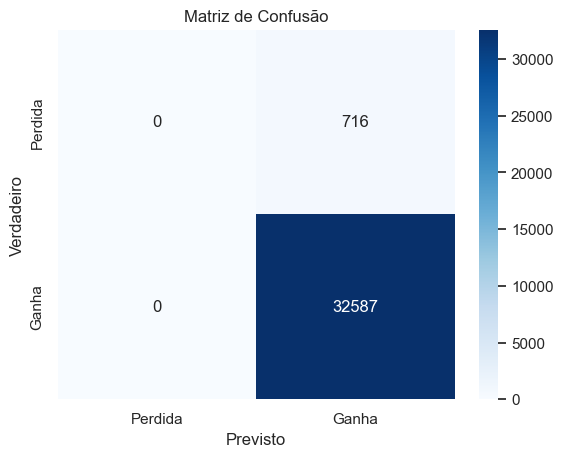

In [35]:
# 4. Matriz de Confusão
# Uma forma visual de ver os acertos e erros.
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perdida', 'Ganha'], yticklabels=['Perdida', 'Ganha'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

Interpretando os Resultados:

Acurácia: De todas as previsões, qual a porcentagem que o modelo acertou? É uma boa métrica geral.

Relatório de Classificação:

Precision (Precisão): Das vezes que o modelo previu "Venda Ganha", quantas ele acertou? Importante para não gerar falsos positivos.

Recall (Sensibilidade): De todas as vendas que foram realmente "Ganhadas", quantas o modelo conseguiu identificar? Importante para não deixar oportunidades passarem.

Matriz de Confusão: Mostra os números brutos. O ideal é ter números altos na diagonal principal (acertos) e baixos fora dela (erros).

**Fase 3 concluída!**

Acabamos de construir, treinar e validar um modelo de machine learning! Temos agora uma "máquina" que, com base em dados de um novo pedido, pode nos dar uma previsão sobre sua chance de sucesso.

O resultado da acurácia provavelmente será muito alto (acima de 98%), pois nosso dataset é "desbalanceado" (temos muito mais vendas ganhas do que perdidas). O classification_report nos dá uma visão mais detalhada e útil da performance real do modelo.

______________________

**Fase 4: Visualização e Dashboarding**

Nesta fase, vamos sair um pouco do nosso notebook Jupyter e usar uma ferramenta de Business Intelligence (BI). A ferramenta recomendada é o Looker Studio (antigo Google Data Studio), por ser gratuita, poderosa e totalmente online.

4.1. Preparando os Dados para o Dashboard
Primeiro, precisamos criar um arquivo CSV final que contenha tanto os dados que usamos na análise quanto as previsões que o nosso modelo gerou.

In [36]:
# Célula 15 (versão corrigida e completa)

# 1. Vamos pegar os dados de teste originais (antes do encoding)
df_teste_final = X_test.copy()
df_teste_final['status_real'] = y_test
df_teste_final['status_previsto'] = y_pred

# 2. Recuperar as informações originais de estado e categoria
df_infos_originais = df_pipeline.loc[df_teste_final.index, ['customer_state', 'product_category_name_english', 'valor_total']]

# 3. Juntar as informações originais com nosso dataframe de resultados
df_dashboard = pd.merge(df_teste_final, df_infos_originais, left_index=True, right_index=True)

# 4. Adicionar a coluna para analisar os acertos e erros do modelo
# ESTA É A LINHA QUE PROVAVELMENTE FALTOU OU FALHOU:
df_dashboard['acerto_do_modelo'] = (df_dashboard['status_real'] == df_dashboard['status_previsto'])

# 5. Selecionar e renomear colunas para o arquivo final (já com sua correção)
colunas_dashboard = {
    'customer_state': 'Estado do Cliente',
    'product_category_name_english': 'Categoria do Produto', # Usando o nome corrigido que você encontrou
    'valor_total': 'Valor Total',
    'status_real': 'Status Real',
    'status_previsto': 'Status Previsto',
    'acerto_do_modelo': 'Acerto do Modelo'
}

# 6. Filtrar pelas chaves do dicionário e renomear
df_dashboard_final = df_dashboard[colunas_dashboard.keys()].rename(columns=colunas_dashboard)

# 7. Salvar em um arquivo CSV
caminho_arquivo_dashboard = '../dados/dados_para_dashboard.csv'
df_dashboard_final.to_csv(caminho_arquivo_dashboard, index=False)

print(f"Arquivo para o dashboard salvo com sucesso em: '{caminho_arquivo_dashboard}'")
display(df_dashboard_final.head())

Arquivo para o dashboard salvo com sucesso em: '../dados/dados_para_dashboard.csv'


,Estado do Cliente,Categoria do Produto,Valor Total,Status Real,Status Previsto,Acerto do Modelo
39460,SP,computers_accessories,91.68,1,1,True
76122,MG,perfumery,281.40,1,1,True
63356,MT,furniture_decor,63.82,1,1,True
49251,RS,bed_bath_table,63.10,1,1,True
80375,BA,baby,116.90,1,1,True
